In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-dark")
df = pd.read_csv("global_freelancers_raw.csv", encoding="latin1")

# ***Data Exploration***

In [34]:
df.head()

,freelancer_ID,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate (USD),rating,is_active,client_satisfaction
0,FL250001,Ms. Nicole Kidd,f,52.0,Italy,Italian,Blockchain Development,11.0,100,NaN,0,NaN
1,FL250002,Vanessa Garcia,FEMALE,52.0,Australia,English,Mobile Apps,34.0,USD 100,3.3,1,84%
2,FL250003,Juan Nelson,male,53.0,Germany,German,Graphic Design,31.0,50,0.0,N,71%
3,FL250004,Amanda Spencer,F,38.0,Australia,English,Web Development,4.0,$40,1.5,N,90%
4,FL250005,Lynn Curtis DDS,female,53.0,Germany,German,Web Development,27.0,30,4.8,0,83%


In [35]:
df.shape

(1000, 12)

In [36]:
df.columns

Index(['freelancer_ID', 'name', 'gender', 'age', 'country', 'language',
       'primary_skill', 'years_of_experience', 'hourly_rate (USD)', 'rating',
       'is_active', 'client_satisfaction'],
      dtype='object')

In [37]:
df.describe()

,age,years_of_experience,rating
count,970.000000,949.000000,899.000000
mean,40.509278,11.340358,2.512570
std,11.942605,9.680610,1.546599
min,20.000000,0.000000,0.000000
25%,31.000000,3.000000,1.400000
50%,41.000000,9.000000,2.600000
75%,51.000000,17.000000,3.800000
max,60.000000,41.000000,5.000000


In [38]:
df.describe(include="O")

,freelancer_ID,name,gender,country,language,primary_skill,hourly_rate (USD),is_active,client_satisfaction
count,1000,1000,1000,1000,1000,1000,906,911,824
unique,1000,992,10,21,16,10,18,8,81
top,FL251000,Amy Lee,FEMALE,South Korea,English,DevOps,40,1,68%
freq,1,2,115,68,215,112,94,190,23


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   freelancer_ID        1000 non-null   object 
 1   name                 1000 non-null   object 
 2   gender               1000 non-null   object 
 3   age                  970 non-null    float64
 4   country              1000 non-null   object 
 5   language             1000 non-null   object 
 6   primary_skill        1000 non-null   object 
 7   years_of_experience  949 non-null    float64
 8   hourly_rate (USD)    906 non-null    object 
 9   rating               899 non-null    float64
 10  is_active            911 non-null    object 
 11  client_satisfaction  824 non-null    object 
dtypes: float64(3), object(9)
memory usage: 93.9+ KB


In [40]:
df.isnull().sum()

freelancer_ID            0
name                     0
gender                   0
age                     30
country                  0
language                 0
primary_skill            0
years_of_experience     51
hourly_rate (USD)       94
rating                 101
is_active               89
client_satisfaction    176
dtype: int64

In [41]:
df.tail()

,freelancer_ID,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate (USD),rating,is_active,client_satisfaction
995,FL250996,Albert Wilcox,Male,56.0,Turkey,Turkish,DevOps,13.0,100,0.0,no,68%
996,FL250997,Cheryl Norris,f,26.0,Germany,German,Blockchain Development,6.0,USD 40,2.8,N,82
997,FL250998,Kathy Watkins,female,37.0,Japan,Japanese,Data Analysis,15.0,75,NaN,False,94%
998,FL250999,John Obrien,m,46.0,Russia,Russian,Machine Learning,22.0,100,2.8,yes,97
999,FL251000,Dawn Green,Female,36.0,Mexico,Spanish,UI/UX Design,18.0,$20,1.7,1,72


# ***Data Cleaning***

### 1. Formatting the column names

In [42]:
# Cleaning column Names
col_names = list()
for i in df.columns:
    if i.__contains__(" "):
        col_names.append(i.split()[0].title())
        continue
    col_names.append(i.title())
df.columns = col_names
df.columns

Index(['Freelancer_Id', 'Name', 'Gender', 'Age', 'Country', 'Language',
       'Primary_Skill', 'Years_Of_Experience', 'Hourly_Rate', 'Rating',
       'Is_Active', 'Client_Satisfaction'],
      dtype='object')

### 2. Removing Duplicate rows

In [43]:
df.drop_duplicates(inplace=True)

### 3. Handling NaN values

In [44]:
df.isna().sum()

Freelancer_Id            0
Name                     0
Gender                   0
Age                     30
Country                  0
Language                 0
Primary_Skill            0
Years_Of_Experience     51
Hourly_Rate             94
Rating                 101
Is_Active               89
Client_Satisfaction    176
dtype: int64

In [81]:
# Handling NaN values in Age column
df["Age"] = df["Age"].fillna(df["Age"].median()).astype(int)

In [46]:
# Handling NaN values in Years_Of_Experience column
df["Years_Of_Experience"] = df["Years_Of_Experience"].fillna(df["Years_Of_Experience"].median())

In [47]:
# Handling NaN values in Hourly_Rate column
df["Hourly_Rate"] = df["Hourly_Rate"].replace(r"[^0-9]", "", regex=True).astype('float')
df["Hourly_Rate"] = df["Hourly_Rate"].fillna(df["Hourly_Rate"].median())

In [48]:
# Handling NaN values in Rating column
df["Rating"] = df["Rating"].fillna(df["Rating"].median())

In [49]:
# Handling NaN values in Is_Active column
df["Is_Active"] = df["Is_Active"].str.strip().str.lower()
print(df["Is_Active"].unique())
replacements = {
    'n' : '0',
    'y' : '1',
    'false' : '0',
    'true' : '1',
    'yes' : '1',
    'no' : '0'
}
df["Is_Active"] = df["Is_Active"].replace(replacements)
df["Is_Active"] = df["Is_Active"].fillna(df["Is_Active"].mode()[0])
df["Is_Active"] = df["Is_Active"].astype(int)
df["Is_Active"].dtypes

['0' '1' 'n' 'false' 'true' 'yes' 'y' nan 'no']


dtype('int64')

In [50]:
# Handling NaN values in Client_Satisfaction column
df["Client_Satisfaction"] = df["Client_Satisfaction"].str.strip()
print(df["Client_Satisfaction"].unique())
df["Client_Satisfaction"] = df["Client_Satisfaction"].replace(r"[^0-9]", "", regex=True)
df["Client_Satisfaction"] = pd.to_numeric(df["Client_Satisfaction"], errors="coerce")
df["Client_Satisfaction"] = df["Client_Satisfaction"].fillna(round(df["Client_Satisfaction"].mean()))

[nan '84%' '71%' '90%' '83%' '94%' '76%' '77%' '86%' '93%' '70%' '69%'
 '60%' '87%' '75%' '68%' '65%' '100%' '92' '89%' '62%' '82' '81%' '63%'
 '67%' '80%' '74%' '85%' '79%' '72%' '64' '88' '96%' '96' '81' '61%' '97%'
 '64%' '73%' '88%' '72' '92%' '82%' '93' '83' '78' '95%' '80' '87' '66%'
 '78%' '68' '91%' '97' '60' '70' '99%' '76' '86' '95' '74' '100' '73' '67'
 '77' '98%' '71' '85' '91' '94' '84' '90' '62' '65' '75' '63' '61' '66'
 '99' '79' '69' '89']


In [51]:
df.isna().sum()

Freelancer_Id          0
Name                   0
Gender                 0
Age                    0
Country                0
Language               0
Primary_Skill          0
Years_Of_Experience    0
Hourly_Rate            0
Rating                 0
Is_Active              0
Client_Satisfaction    0
dtype: int64

### 4. Cleaning The Inconsistent Data

In [52]:
# Freelancer Id column
df["Freelancer_Id"] = df["Freelancer_Id"].str.strip()

In [53]:
# Name column
df["Name"] = df["Name"].str.strip().replace(r"[^a-zA-Z0-9 ]", "", regex=True)

In [54]:
# Gender Column
df["Gender"] = df["Gender"].str.lower().str.strip()
print(df["Gender"].unique())
replacements = {
    'f' : "Female",
    'female' : "Female",
    'm' : "Male",
    'male' : "Male"
}
df["Gender"] = df["Gender"].replace(replacements)
print(df["Gender"].unique())

['f' 'female' 'male' 'm']
['Female' 'Male']


In [55]:
# Country columnn
df["Country"].unique()
# Data is already organized perfectly

array(['Italy', 'Australia', 'Germany', 'Netherlands', 'Indonesia',
       'United States', 'Turkey', 'United Kingdom', 'Argentina', 'Japan',
       'India', 'Brazil', 'South Korea', 'Russia', 'Canada', 'France',
       'Egypt', 'South Africa', 'China', 'Mexico', 'Spain'], dtype=object)

In [56]:
# Language column
df["Language"].unique()
# Data is already organized perfectly

array(['Italian', 'English', 'German', 'Dutch', 'Indonesian', 'Turkish',
       'Spanish', 'Japanese', 'Hindi', 'Portuguese', 'Korean', 'Russian',
       'French', 'Arabic', 'Afrikaans', 'Mandarin'], dtype=object)

In [57]:
# Primary Skill column
df["Primary_Skill"].unique()
# Data is already organized perfectly

array(['Blockchain Development', 'Mobile Apps', 'Graphic Design',
       'Web Development', 'AI', 'Data Analysis', 'UI/UX Design',
       'Cybersecurity', 'DevOps', 'Machine Learning'], dtype=object)

# ***Loading The Dataset***

In [58]:
df.to_csv("global_freelancers_cleaned.csv")

# ***EDA - (Exploratory Data Analysis)***

In [59]:
df.head()

,Freelancer_Id,Name,Gender,Age,Country,Language,Primary_Skill,Years_Of_Experience,Hourly_Rate,Rating,Is_Active,Client_Satisfaction
0,FL250001,Ms Nicole Kidd,Female,52.0,Italy,Italian,Blockchain Development,11.0,100.0,2.6,0,79.0
1,FL250002,Vanessa Garcia,Female,52.0,Australia,English,Mobile Apps,34.0,100.0,3.3,1,84.0
2,FL250003,Juan Nelson,Male,53.0,Germany,German,Graphic Design,31.0,50.0,0.0,0,71.0
3,FL250004,Amanda Spencer,Female,38.0,Australia,English,Web Development,4.0,40.0,1.5,0,90.0
4,FL250005,Lynn Curtis DDS,Female,53.0,Germany,German,Web Development,27.0,30.0,4.8,0,83.0


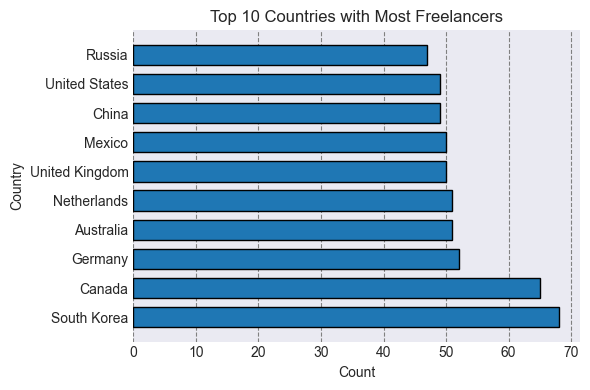

In [71]:
data = df.groupby("Country").count().reset_index()[["Country", "Name"]].rename(columns={"Name" : "Count"}).sort_values(by="Count", ascending=False)
data = data.reset_index(drop=True).head(10)

plt.figure(figsize=(6, 4))
plt.barh(data["Country"], data["Count"], height=0.7, edgecolor="black")
plt.title("Top 10 Countries with Most Freelancers")
plt.ylabel("Country")
plt.xlabel("Count")
plt.tight_layout()
plt.grid(True, ls="--", color="grey", axis="x")

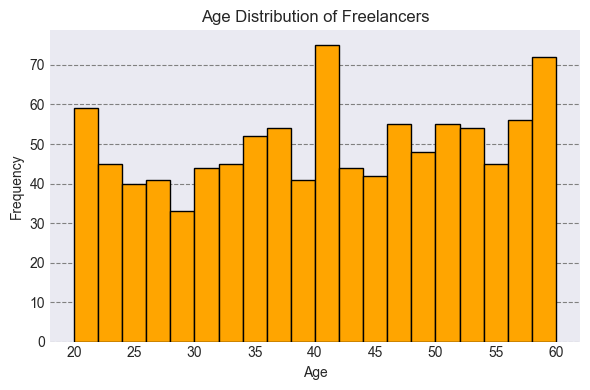

In [91]:
plt.figure(figsize=(6, 4))
plt.hist(df["Age"], edgecolor="black", bins=20, color="orange")
plt.title("Age Distribution of Freelancers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.grid(True, axis="y", ls="--", color="grey")


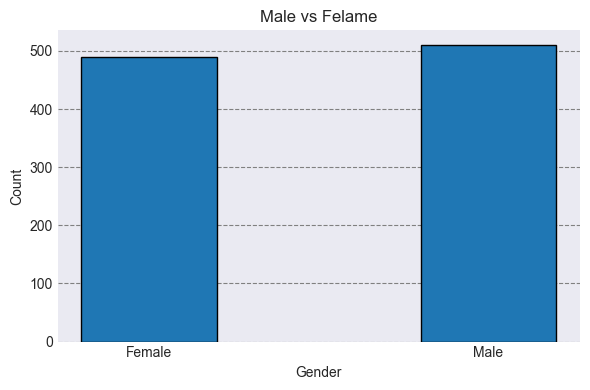

In [101]:
data = df.groupby("Gender").count().reset_index()[["Gender", "Name"]].rename(columns={"Name" : "Count"})

plt.figure(figsize=(6, 4))
plt.bar(data["Gender"], data["Count"], width=0.4, edgecolor="black")
plt.title("Male vs Felame")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.grid(True, ls="--", color="grey", axis="y")

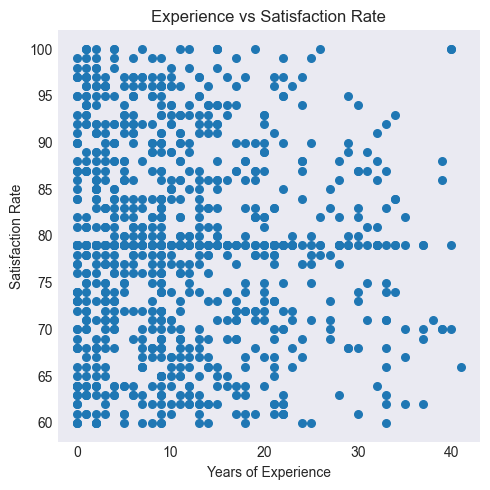

In [116]:
# df.groupby("Years_Of_Experience")["Client_Satisfaction"].
data = df[["Years_Of_Experience", "Client_Satisfaction"]].sort_values(by="Years_Of_Experience", ascending=False).reset_index(drop=True)

plt.figure(figsize=(5, 5))
plt.scatter(df["Years_Of_Experience"], df["Client_Satisfaction"], s=30)
plt.title("Experience vs Satisfaction Rate")
plt.xlabel("Years of Experience")
plt.ylabel("Satisfaction Rate")
plt.tight_layout()

In [119]:
df[["Years_Of_Experience", "Is_Active"]]

,Years_Of_Experience,Is_Active
0,11.0,0
1,34.0,1
2,31.0,0
3,4.0,0
4,27.0,0
...,...,...
995,13.0,0
996,6.0,0
997,15.0,0
998,22.0,1
